In [32]:
import pandas as pd
import numpy as np

In [5]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [6]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [7]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [8]:
# df = pd.concat([tmp, tmp_2])

In [9]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [10]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [11]:
# male_df = df[df['Gender'] == 'Male']

In [12]:
# female_df = df[df['Gender'] == 'Female']

In [13]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [14]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [15]:
from sklearn.model_selection import train_test_split

def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

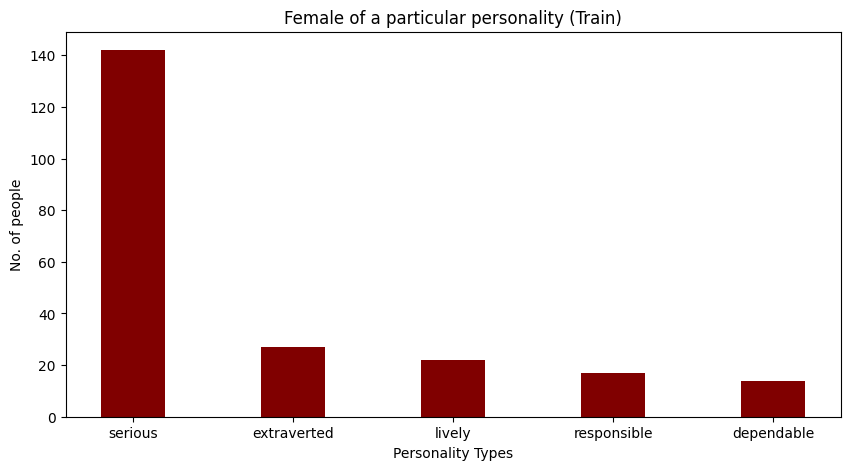

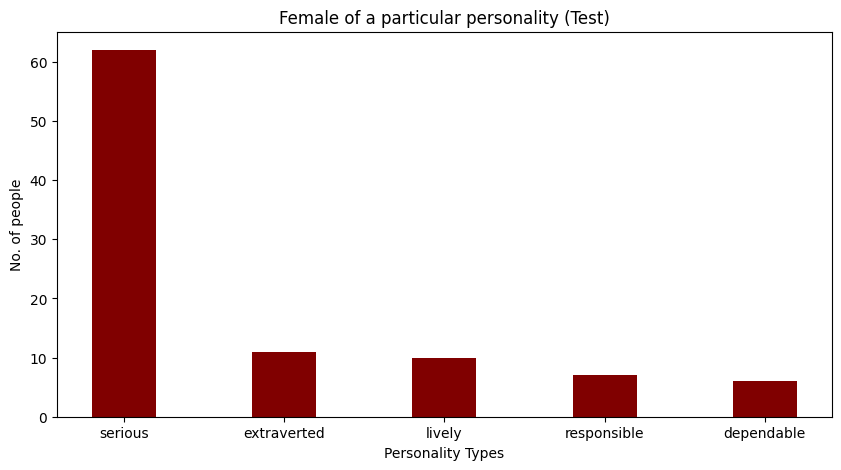

In [16]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality (Class label)'].value_counts()._get_axis(axis=0)),
                list(i['Personality (Class label)'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [17]:
X_train

,conscientiousness,agreeableness,neuroticism,extraversion,openness,Age
125,1,6,2,5,7,19
90,4,5,4,6,4,24
192,7,4,6,3,3,18
67,5,1,6,4,5,21
212,3,1,7,5,6,24
...,...,...,...,...,...,...
70,1,5,1,5,5,19
51,5,4,5,3,5,19
117,3,7,3,4,4,18
108,7,3,2,6,7,18


In [18]:
y_train

,Personality (Class label)
125,serious
90,dependable
192,lively
67,serious
212,extraverted
...,...
70,serious
51,serious
117,serious
108,dependable


In [19]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_test)

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,1.0
92,0.0,0.0,1.0,0.0,0.0
93,0.0,0.0,0.0,0.0,1.0
94,0.0,1.0,0.0,0.0,0.0


In [20]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [21]:
y_train

,Personality (Class label)
125,serious
90,dependable
192,lively
67,serious
212,extraverted
...,...
70,serious
51,serious
117,serious
108,dependable


In [22]:
# y_train = one_hot_encode(y_train)

In [23]:
# y_test = one_hot_encode(y_test)

In [24]:
# X = X_train + X_test
X = pd.concat([X_train, X_test])
# y = y_train + y_test
y = pd.concat([y_train, y_test])

X.isna().sum()

conscientiousness    0
agreeableness        0
neuroticism          0
extraversion         0
openness             0
Age                  0
dtype: int64

In [25]:
# y['Personality (Class label)']

In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

In [27]:
# X_train

In [28]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, y_enc,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 81.25%
MAE scores:
 [0.03125    0.125      0.125      0.28571429 0.15873016]
Average MAE score (across experiments):
0.14513888888888887


In [29]:
X_train, X_test, y_train, y_test = df_load_and_split('male')

In [33]:
from sklearn import svm
clf = svm.SVC(
 C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 64.58333333333334%
MAE scores:
 [0.828125   0.890625   0.84375    0.88888889 0.88888889]
Average MAE score (across experiments):
0.8680555555555556


In [34]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

clf = KNeighborsClassifier(leaf_size=5, p=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')




Accuracy: 67.70833333333334%


In [35]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                    solver='adam', alpha=0.00001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=20000, shuffle=True, random_state=42, 
                    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=100, max_fun=15000)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 89.58333333333334%
MAE scores:
 [0.15625    0.21875    0.         0.06349206 0.15873016]
Average MAE score (across experiments):
0.11944444444444444


In [36]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf = GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, max_iter_predict=100, 
                                warm_start=False, copy_X_train=True, 
                                random_state=42, multi_class='one_vs_rest', 
                                n_jobs=None)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 91.66666666666666%
MAE scores:
 [0.21875    0.125      0.0625     0.19047619 0.12698413]
Average MAE score (across experiments):
0.14474206349206348


In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, min_samples_split=30, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 69.79166666666666%
MAE scores:
 [0.734375   0.796875   0.546875   0.80952381 0.73015873]
Average MAE score (across experiments):
0.7235615079365079


In [38]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(learning_rate=0.01, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 64.58333333333334%
MAE scores:
 [0.78125    0.890625   0.890625   0.85714286 0.85714286]
Average MAE score (across experiments):
0.8553571428571429


In [39]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 70.83333333333334%
MAE scores:
 [0.4375     0.578125   0.671875   0.73015873 0.77777778]
Average MAE score (across experiments):
0.6390873015873015


In [40]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=60, tol=0.1, max_iter=1000000, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 72.91666666666666%
MAE scores:
 [0.390625   0.53125    0.484375   0.68253968 0.85714286]
Average MAE score (across experiments):
0.589186507936508


In [41]:
# from sklearn.svm import NuSVC

# clf = NuSVC(random_state=42)

# clf = clf.fit(X_train,np.ravel(y_train))

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

In [42]:
from sklearn import svm
clf = svm.SVC(
 C=100000.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
    shrinking=True, probability=False, tol=0.001, cache_size=200, 
    random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 85.41666666666666%
MAE scores:
 [0.28125    0.15625    0.15625    0.31746032 0.15873016]
Average MAE score (across experiments):
0.21398809523809526


In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 72.91666666666666%
MAE scores:
 [0.59375    0.59375    0.546875   0.52380952 0.65079365]
Average MAE score (across experiments):
0.5817956349206349


In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 73.95833333333334%
MAE scores:
 [0.4375     0.53125    0.4375     0.6984127  0.73015873]
Average MAE score (across experiments):
0.5669642857142858


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, 
                                 n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, 
                                 min_impurity_decrease=0.0, init=None, 
                                 random_state=42, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, 
                                 warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, 
                                 ccp_alpha=0.0)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 91.66666666666666%
MAE scores:
 [0.03125    0.125      0.         0.19047619 0.12698413]
Average MAE score (across experiments):
0.09474206349206349


In [46]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
    random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
    class_weight=None, ccp_alpha=0.0
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 93.75%
MAE scores:
 [0.03125    0.125      0.15625    0.38095238 0.15873016]
Average MAE score (across experiments):
0.17043650793650794


In [77]:
from xgboost import XGBRegressor

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBRegressor()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Mean Absolute Percentage Error: 1.0773381298179416e+16%
Mean Absolute Error: 4.514386207720993%
MAE scores:
 [0.04767927 0.2559581  0.15067515 0.27704464 0.134274  ]
Average MAE score (across experiments):
0.17312623121873322


In [78]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 95.83333333333334%
MAE scores:
 [0.125      0.125      0.         0.15873016 0.0952381 ]
Average MAE score (across experiments):
0.1007936507936508


In [94]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500)
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 95.41666666666667%
MAE scores:
 [0.125      0.125      0.0625     0.15873016 0.12698413]
Average MAE score (across experiments):
0.11964285714285713


In [99]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 95.41666666666667%
MAE scores:
 [0.125      0.125      0.0625     0.15873016 0.12698413]
Average MAE score (across experiments):
0.11964285714285713


In [100]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 94.79166666666666%
MAE scores:
 [0.03125    0.125      0.0625     0.15873016 0.12698413]
Average MAE score (across experiments):
0.10089285714285715


In [103]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05, n_jobs=4
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 94.79166666666666%
MAE scores:
 [0.03125    0.125      0.0625     0.15873016 0.12698413]
Average MAE score (across experiments):
0.10089285714285715


In [102]:
for i in range(5):
    print('Expected: ', list(tmp_2.iloc[i]))
    print('Predicted: ', y_pred[i])

Expected:  [0.0, 0.0, 0.0, 1.0, 0.0]
Predicted:  [0. 0. 0. 1. 0.]
Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [1. 0. 0. 0. 0.]
Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]
Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]
Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

# Build the model
model = Sequential()
model.add(Dense(1000, input_dim=6, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, tmp, epochs=100, batch_size=8, validation_data=(X_test, tmp_2))

In [ ]:
2

In [72]:
y_pred.shape

(96, 5)

In [69]:
y_pred

array([[ 1.36949937e-03,  4.20355762e-04,  4.57841001e-04,
         9.92479801e-01,  8.07191990e-03],
       [ 8.93087149e-01,  4.79068141e-03,  5.37621081e-02,
         1.11792013e-01,  3.39652538e-01],
       [ 5.37085987e-04, -8.38451786e-04,  3.51589313e-03,
         4.74246498e-03,  1.00164258e+00],
       [ 1.43146049e-03,  1.28183758e-03,  3.02596251e-04,
        -1.47865224e-03,  9.99626100e-01],
       [ 1.91972897e-04, -3.35985329e-04,  6.58495555e-05,
        -4.03050566e-04,  9.99908686e-01],
       [ 9.96703267e-01,  4.48786523e-06, -2.54099187e-03,
         1.47719739e-03,  2.79484363e-03],
       [-1.14931501e-02, -9.78478813e-04,  4.65937138e-01,
        -1.27218785e-02,  7.52955914e-01],
       [-2.41926964e-02,  1.53377175e-03,  1.56821823e-03,
        -1.06632542e-02,  1.09848559e+00],
       [ 3.26614222e-03, -1.71003793e-03, -3.88327135e-05,
         9.86931613e-04,  9.98041749e-01],
       [ 1.07903620e-02,  3.97018135e-01, -2.21245587e-02,
         5.38221851e-04

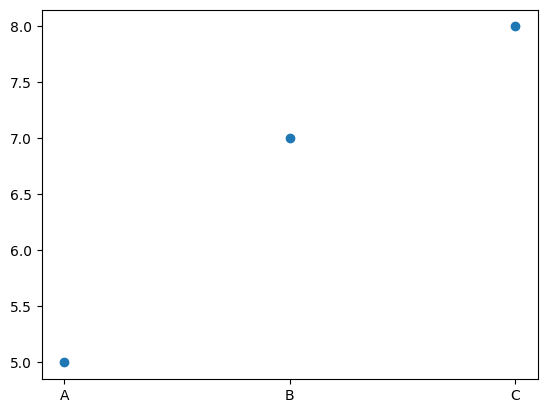

In [106]:
import matplotlib.pyplot as plt

y = [5,7,8,]
x = ['A', 'B', 'C']

plt.scatter(x, y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()